<center>
    COMP4600/5300 - Reinforcement Learning

# Final Project

### Due: Thursday, Dec 9th 11:59 pm
    
</center>

Student Name: Mohamed Martini

## Overview

### Small Env

For this part a discrete 2D ($N \times M$) environment was built, with dimensions $ N = M = 15$. In this environment, the terminal state is surrounded by fire, so the agent cannot reach the terminal state until it presses the button to kill the fire off.

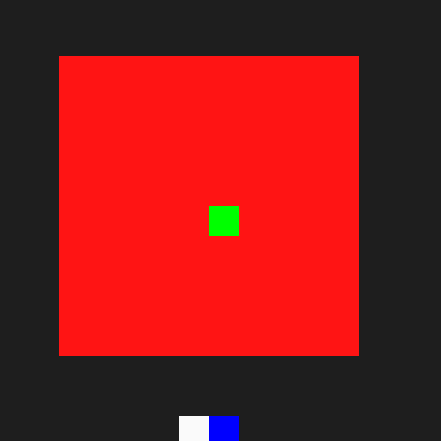
<h5 align="center">
    Figure 1 - Before pressing the button (blue), the terminal state (green) is surrounded by file and the agent (white) cannot get to it.
</h5>

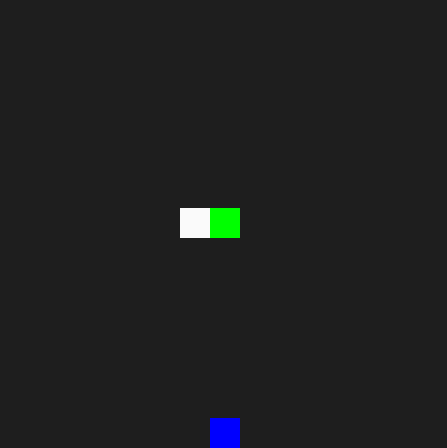
<h5 align="center">
    Figure 2 - After pressing the button (blue), the fire dies out and the agent can get to the terminal state (green).
</h5>

The challenge in this environment is that it changes when the button is pressed. Certain cells which could not be visited before become available when the button is pressed. This makes the problem effectively two problems in one: in the first part, the agent must press the button (visit the blue cell), then pursue the terminal state in the second part.

The state vector $\textbf{s}$ is composed of three elements: the row and column of the agent, and whether the button is pressed. 

$$
\textbf{s}_t = (row_{a_t} \in \mathcal{R}^N , col_{a_t} \in \mathcal{R}^M, btn_t \in [0, 1]); \in \mathcal{R}^{15 \times 15 \times 2}
$$

The agent can move in any of the four directions: 

$$
A = \{\rightarrow, \uparrow, \downarrow, \leftarrow\}
$$

The reward function is:

$$
R = 
\begin{cases}
    -0.1 & \text{each time step} \\
    -0.5 & \text{touching fire} \\
    -0.1 & \text{pressing button} \\
    0 & \text{terminal state}
\end{cases}
$$

### Large Env

This environment is a scaled up version of the small environment ($32 \times 30$), with a main difference, which is the moving hazard. In this environment, the agent must go a long way to discover that it first needs to press the blue button, then head to the terminal state at the other end of the map, where it is faced with a moving hazard, which is the red bar shown in Fig. 3 below. If the agent spawns in the bottom half of the map, it cannot reach the terminal state unless it presses the button (similar to the small env). When the button is pressed, the fire barrier is removed, and all other fire cells become walls. If the agent bumps into the moving hazard, it is pushed five steps to the down, farther away from the terminal state.

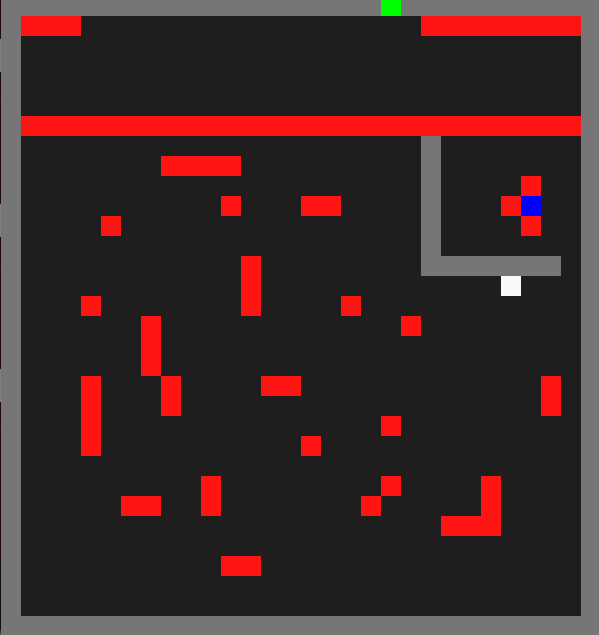
<h5 align="center">
    Figure 3 - Large Grid World - Before pressing the button.
</h5>

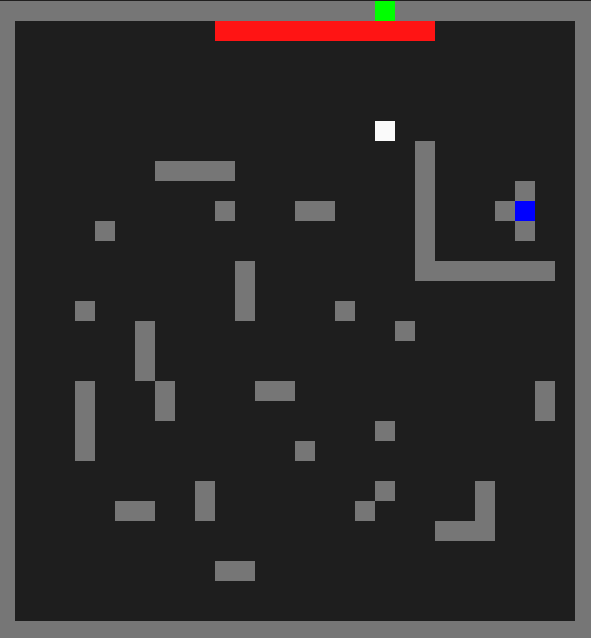
<h5 align="center">
    Figure 4 - After pressing the button, agent heads to terminal state, which is currently blocked by the moving hazard.
</h5>

The state vector $\textbf{s}$ is composed of three elements: the row and column of the agent, and whether the button is pressed. 

$$
\textbf{s}_t = (row_{a_t} \in \mathcal{R}^N , col_{a_t} \in \mathcal{R}^M, col_{f_t} \in \mathcal{R}^M, btn_t \in [0, 1]); \in \mathcal{R}^{32 \times 30 \times 30 \times 2}
$$

where $col_{f_t}$ is the center position of the moving fire. The bar moves in a predicted manner, thus if we make the position of the bar to be in the state vector, then the agent can find the best actions to do when it is near the moving hazard. The added state dimension and the scaling up of the grid size makes the state space vastly larger, and the algorithm is predicted to take a long time to learn the optimal policy. 

The large grid area also means that for states far away from the terminal state, it takes a long time to learn their value. Thus, the learning rate cannot be too high, or else the agent will converge to random values on these states, and get stuck in a loop. 


After 290k episodes, the agents started showing signs of factoring in the bar position into its movement, as can be seen in the provided video files. However, to perfectly learn the moving fire, more training seems to be needed.

The reward function is as shown below. The reward function must make it worthwile for the agent to waste some time in order to avoid the moving hazard. Aids with this is the addition that the agent is pushed away every time it touches the moving fire.

$$
R = 
\begin{cases}
    -.1 & \text{each time step} \\
    -0.5 & \text{touching fire} \\
    -1 & \text{touching moving fire} \\
    0 & \text{pressing button} \\
    0 & \text{terminal state}
\end{cases}
$$

## Task 1

### algorithm

At first, Q learning algorithm was used due to its light weightedness and its adequacy to learn the given task. However, the stochasticity in the new provided environment made Double Q learning a better candidate, because in Double Q learning, both Q tables need to be fooled by the environment, making the overall algorithm immune to reasonable stochasticity. Accordingly, the agent class was changed to use Double Q learning. 


Other algorithms can also solve the used environments. N-Step TD in particular might be a great candidate due to its efficacy in propagating information from the terminal state outward. However, Double Q learning is considerable faster, and with all the heavy computation requirements, Double Q learning was chosen. 

### parameters

Dynamic values were used for the exploration rate $\varepsilon(s)$, and learning rate $\alpha(s,a)$ according to the eqiations below:

$$\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$$
$$\alpha(s,a)=\frac{1}{n(s,a)^{\alpha}}; \alpha \in [0, 1]$$

According to the equations above, the epsiolon of each state decays with every state visit, and the learning rate of each state-action pair is decreased with each state-action pair selection, and all is left to finetune is $\gamma$ and $\alpha$. A high gamma $(1)$ was used to increasse the far sightedness of the agent. and $\alpha$ was reduced from $1$ at first to below $0.1$ for the small and large environments (values in figures). At high $\alpha$ values, the learning rate decayed too quicky before the agent had any useful information in the states far away from the terminal state. Thus, reducing the learning rate allowed the agent to gain more experience before converging, which helped it converge to better values.

### Training

#### My Small Env

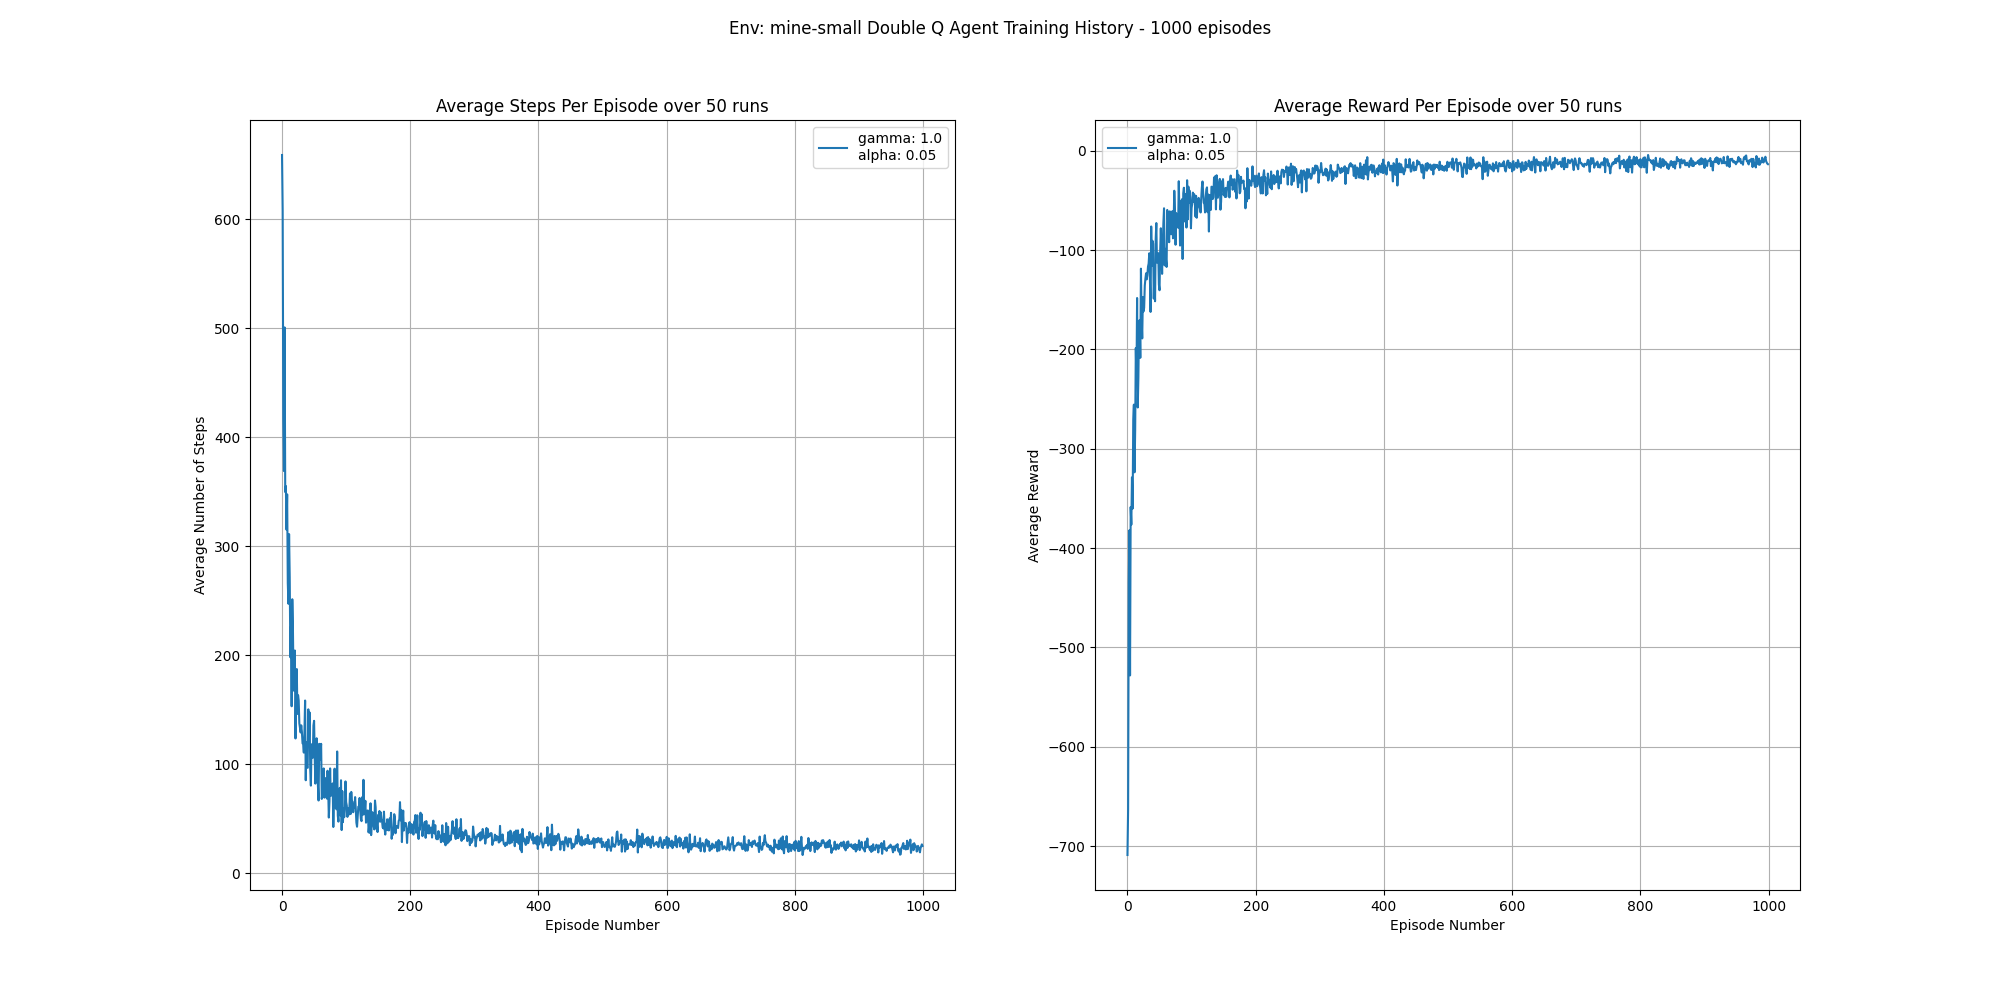
<h5 align="center">
    Figure 5 - Double Q agent training, averaged over 50 runs. (left) Average time step per episode over 50 runs. (right) Average reward per episode over 50 runs. 
</h5>

#### My Large Env

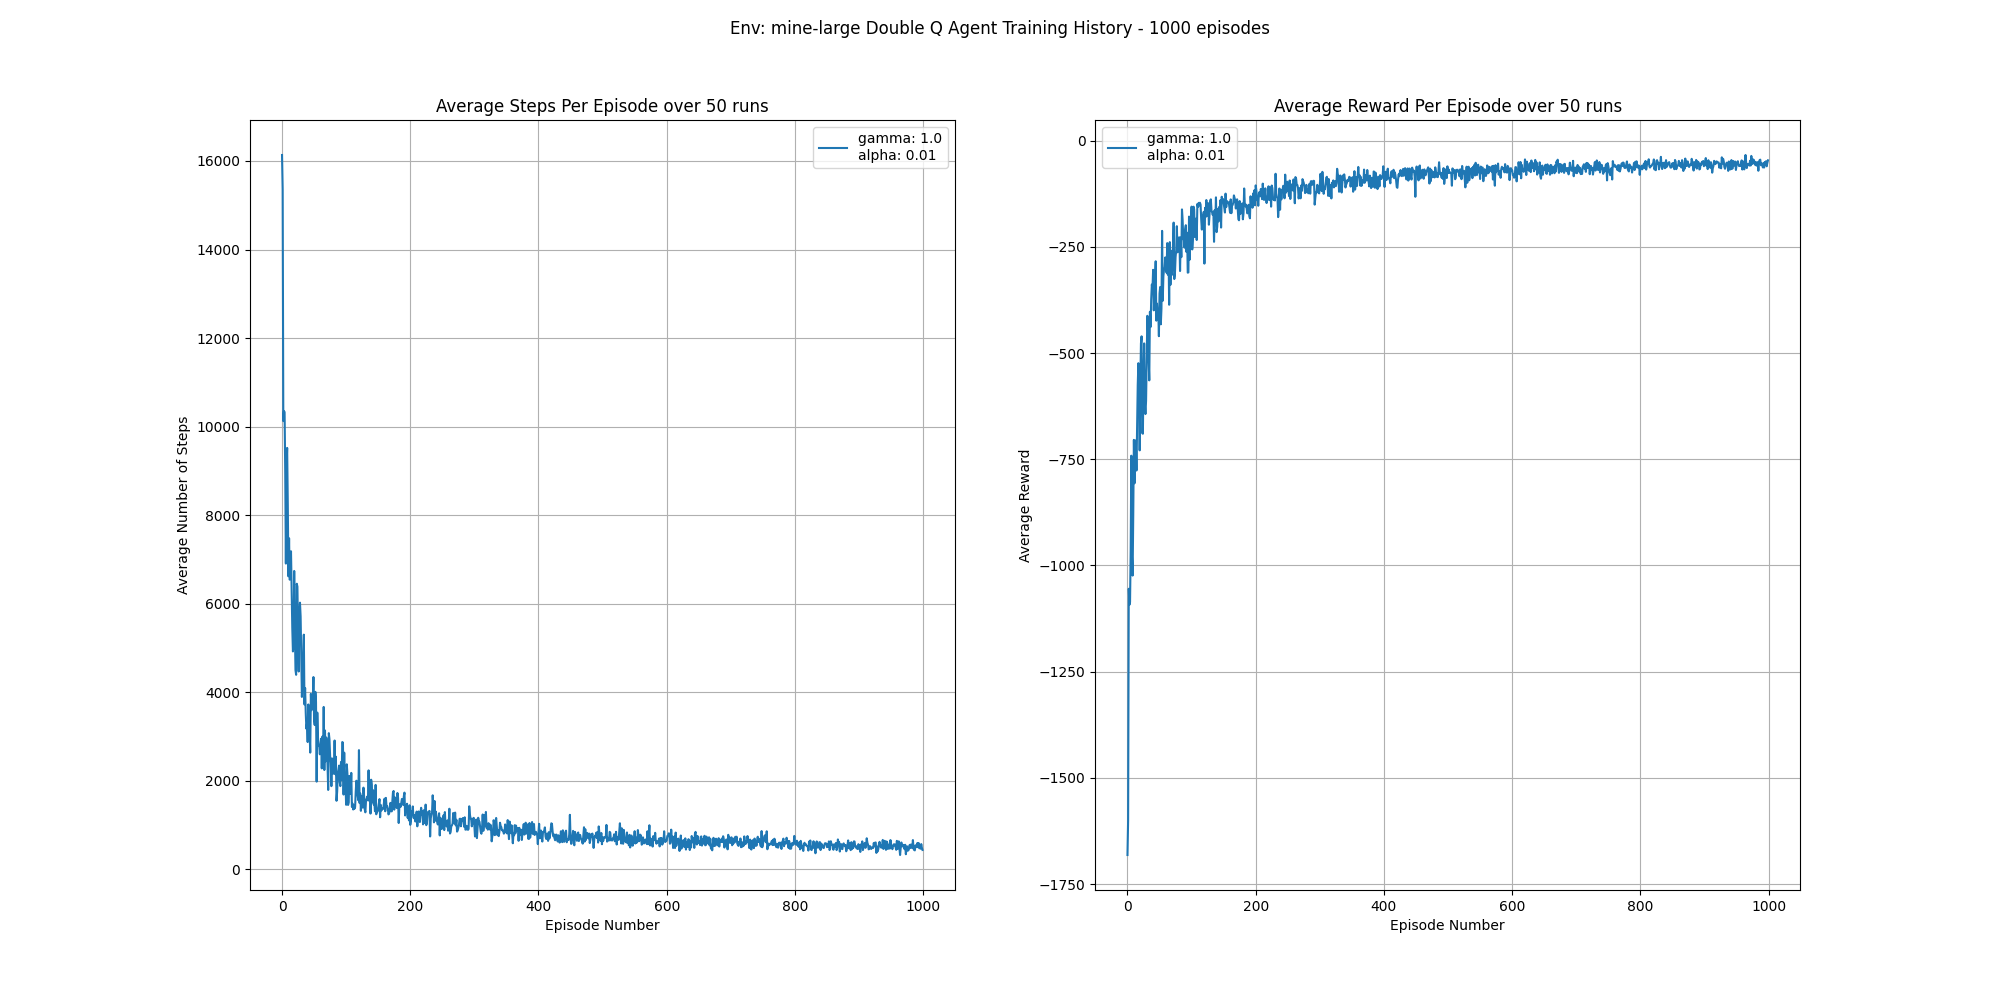

## Evaluation

For evaluation, the agent was trained for 20k episodes on the small environment, and 290k episodes on the large environment. Given the difference is state dimesions, agents in the large environment must train for much longer to achieve the same efficiency. However, due to time constraints, only 290k episodes were completed for the large environment.

Figure 6 below shows the performance of the trained agents in both environments in 100 episodes, initialized from random states.

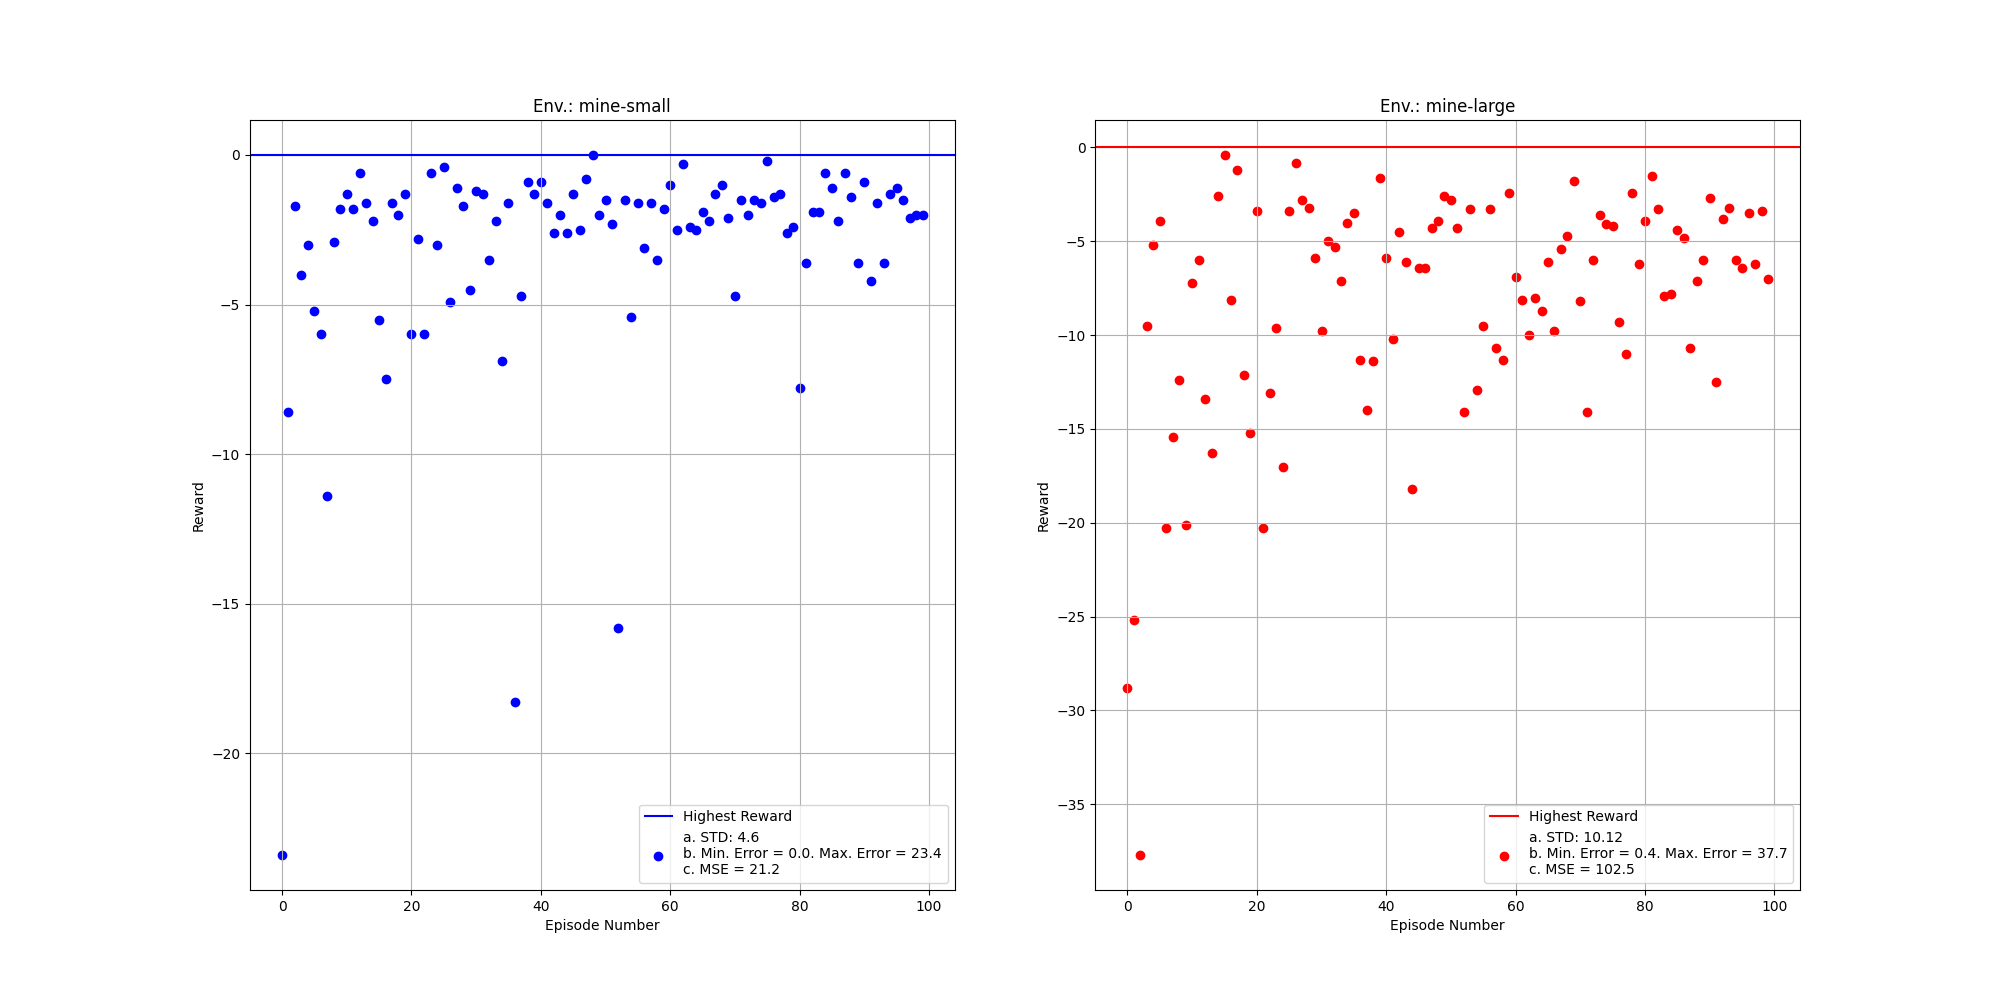